In [1]:
!pip install yfinance

In [1]:
import pandas as pd
import yfinance as yf

In [2]:
start = '2021-01-01'
end = '2021-10-31'

In [3]:
data = yf.download('CL=F PTTEP.BK OR.BK PTTGC.BK PTT.BK', start=start, end=end)

[*********************100%***********************]  5 of 5 completed


In [4]:
df = data.Close

In [5]:
df = df.fillna(method='ffill')
df = df.pct_change()
df = df.dropna()
df = df[['CL=F','OR.BK','PTTEP.BK','PTTGC.BK','PTT.BK']]

In [6]:
df[df['CL=F'] == 0]

,CL=F,OR.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,
2021-02-15,0.0,0.162393,0.031390,0.011858,0.024845
2021-04-02,0.0,0.000000,0.013100,-0.007905,-0.006135
2021-05-31,0.0,-0.008264,0.008511,0.003968,0.006369
2021-07-05,0.0,-0.008333,0.008475,0.004167,0.006452
2021-09-06,0.0,0.000000,-0.013636,-0.024390,-0.006536
2021-09-16,0.0,-0.008621,0.004444,0.012500,0.019231
2021-10-25,0.0,0.000000,-0.023904,-0.011364,-0.012500


In [7]:
df = df[~(df['CL=F'] == 0)]

In [8]:
df.loc[:,['OR.BK','PTTEP.BK','PTTGC.BK','PTT.BK']]

,OR.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,
2021-02-12,0.000000,0.000000,0.000000,0.000000
2021-02-16,-0.036765,-0.008696,0.035156,0.000000
2021-02-17,-0.099237,-0.008772,-0.011321,-0.012121
2021-02-18,0.025424,0.008850,0.000000,-0.006135
2021-02-19,0.041322,-0.021930,-0.030534,-0.012346
...,...,...,...,...
2021-10-22,0.000000,0.000000,0.000000,0.000000
2021-10-26,0.009009,0.012245,-0.003831,-0.006329
2021-10-27,0.000000,-0.020161,-0.019231,-0.012739


In [9]:
df.loc[:,['OR.BK','PTTEP.BK','PTTGC.BK','PTT.BK']].any(axis=1) == 0

Date
2021-02-12     True
2021-02-16    False
2021-02-17    False
2021-02-18    False
2021-02-19    False
              ...  
2021-10-22     True
2021-10-26    False
2021-10-27    False
2021-10-28    False
2021-10-29    False
Length: 179, dtype: bool

In [10]:
df.loc[df.loc[:,['OR.BK','PTTEP.BK','PTTGC.BK','PTT.BK']].any(1) != 0]

,CL=F,OR.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,
2021-02-16,0.009753,-0.036765,-0.008696,0.035156,0.000000
2021-02-17,0.018152,-0.099237,-0.008772,-0.011321,-0.012121
2021-02-18,-0.010141,0.025424,0.008850,0.000000,-0.006135
2021-02-19,-0.021150,0.041322,-0.021930,-0.030534,-0.012346
2021-02-22,0.037981,0.007937,-0.008969,-0.019685,0.000000
...,...,...,...,...,...
2021-10-21,-0.016335,-0.008929,0.016194,-0.003774,0.012658
2021-10-26,0.010626,0.009009,0.012245,-0.003831,-0.006329
2021-10-27,-0.023509,0.000000,-0.020161,-0.019231,-0.012739


In [11]:
#applied on df.loc[~(df==0).any(axis=1)]
#applied on df.loc[~(df==0).all(axis=1)]
df = df.loc[~(df.loc[:,['OR.BK','PTTEP.BK','PTTGC.BK','PTT.BK']].all(1) == 0)]

Don't do != instead of ~

In [12]:
df

,CL=F,OR.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,
2021-02-17,0.018152,-0.099237,-0.008772,-0.011321,-0.012121
2021-02-19,-0.021150,0.041322,-0.021930,-0.030534,-0.012346
2021-02-23,0.002927,-0.023622,0.031674,0.028112,0.012500
2021-02-24,0.025134,-0.008065,-0.004386,-0.019531,-0.024691
2021-03-03,0.025607,0.017094,0.008889,0.027888,0.031447
...,...,...,...,...,...
2021-10-19,0.006308,-0.017699,-0.012048,-0.018727,-0.012500
2021-10-21,-0.016335,-0.008929,0.016194,-0.003774,0.012658
2021-10-26,0.010626,0.009009,0.012245,-0.003831,-0.006329


In [13]:
15/55

0.2727272727272727

In [14]:
X_train = df.iloc[:-15,:-1]
X_test = df.iloc[-15:,:-1]
y_train = df.iloc[:-15,-1]
y_test = df.iloc[-15:,-1]

In [15]:
X_train

,CL=F,OR.BK,PTTEP.BK,PTTGC.BK
Date,,,,
2021-02-17,0.018152,-0.099237,-0.008772,-0.011321
2021-02-19,-0.021150,0.041322,-0.021930,-0.030534
2021-02-23,0.002927,-0.023622,0.031674,0.028112
2021-02-24,0.025134,-0.008065,-0.004386,-0.019531
2021-03-03,0.025607,0.017094,0.008889,0.027888
...,...,...,...,...
2021-08-23,0.053273,0.034483,0.039801,0.026549
2021-08-24,0.028946,-0.016667,0.038278,0.025862
2021-08-30,0.006837,0.016949,0.046083,0.024194


In [16]:
from sklearn.ensemble import RandomForestRegressor #another one is RandomForestClassifier

In [17]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 4)

In [18]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=4)

In [19]:
predictions = rf.predict(X_test)

In [20]:
compare = pd.DataFrame(y_test)
compare['predict'] = predictions
compare

,PTT.BK,predict
Date,,
2021-09-02,0.013333,0.007668
2021-09-10,0.020134,-0.007414
2021-09-21,0.012821,0.008713
2021-09-27,0.012500,0.018161
2021-10-05,0.019231,0.009488
2021-10-07,-0.012500,0.007483
2021-10-11,0.006289,-0.003281
2021-10-14,-0.012500,0.005533
2021-10-15,-0.006329,-0.007132


<AxesSubplot:xlabel='Date'>

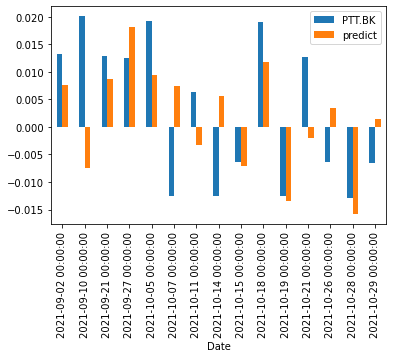

In [21]:
compare.plot(kind='bar')

In [22]:
!pip install pydot

In [23]:
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'tree.png'

In [32]:
rf.feature_importances_

AttributeError: 'function' object has no attribute 'feature_importances_'

In [ ]:
rf_small = RandomForestRegressor(n_estimators=100, max_depth = 3)
rf_small.fit(X_train, y_train)

In [ ]:
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X_test.columns, rounded = True, precision = 1)


In [ ]:
predict_small = rf_small.predict(X_test)

In [ ]:
compare['predict_small'] = predict_small
compare.plot(kind='bar')

In [ ]:
rf_small = RandomForestRegressor(n_estimators=100, max_depth = 2, random_state=18)
rf_small.fit(X_train, y_train)
predict_small = rf_small.predict(X_test)
compare['predict_small'] = predict_small
compare.plot(kind='bar')

In [ ]:
rf_small = RandomForestRegressor(n_estimators=1000, max_depth = 2)
rf_small.fit(X_train, y_train)
predict_small = rf_small.predict(X_test)
compare['predict_small'] = predict_small
compare.plot(kind='bar')

In [ ]:
rf_small = RandomForestRegressor(n_estimators=200, max_depth = 5,random_state =9)
rf_small.fit(X_train, y_train)
predict_small = rf_small.predict(X_test)
compare['predict_small'] = predict_small
compare.plot(kind='bar')

In [ ]:
feature_imp = pd.DataFrame(rf.feature_importances_,index=X_test.columns,columns=['Feature Importance'])
feature_imp

In [ ]:
df.corr()

In [ ]:
feature_imp['small'] = rf_small.feature_importances_
feature_imp.columns = [['big','small']]

In [ ]:
feature_imp

In [ ]:
X_train

In [ ]:
new_X_train = X_train.iloc[:,2:]
new_X_test = X_test.iloc[:,2:]
new_X_train

In [ ]:
rf_new = RandomForestRegressor(n_estimators=200, max_depth =3,random_state =9)
rf_new.fit(new_X_train, y_train)
predict_new = rf_new.predict(new_X_test)
compare['predict_new'] = predict_new
compare.plot(kind='bar')

# Tuning

In [24]:
from sklearn.metrics import mean_squared_error

In [56]:
def rf(X_train,y_train,X_test,y_test,n_estimators = 100,criterion = "squared_error",max_depth=3):
    rf = RandomForestRegressor(n_estimators = n_estimators,
                              criterion = criterion,
                              max_depth = max_depth)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    return mse , y_pred
    
    
    

In [40]:
rf(X_train,y_train,X_test,y_test)

0.00012942666057638876

In [57]:
def grid_rf(X_train,y_train,X_test,y_test,n_estimators_choice,criterion_choice,max_depth):
    result_list = []
    for i in n_estimators_choice:
        for j in criterion_choice:
            for k in max_depth:
                result,y_pred = rf(X_train,y_train,X_test,y_test,n_estimators = i,criterion = j,max_depth = k)
                
                compare = pd.DataFrame(y_test)
                compare['predict'] = y_pred
                
                direction_ok = (compare.product(1)>0).sum()

                result_list.append([i,j,k,result,direction_ok])
    return result_list
    

In [58]:
n = [100,200,500]
d= [3,4,5]
cri = ['squared_error','absolute_error']

grid_rf(X_train,y_train,X_test,y_test,n_estimators_choice = n,criterion_choice = cri,max_depth = d)

[[100, 'squared_error', 3, 0.00014192622817284012, 8],
 [100, 'squared_error', 4, 0.00013933561156404448, 8],
 [100, 'squared_error', 5, 0.00014300219534166657, 8],
 [100, 'absolute_error', 3, 0.00012837100240524647, 8],
 [100, 'absolute_error', 4, 0.00013065502843049944, 8],
 [100, 'absolute_error', 5, 0.00015087116246539776, 8],
 [200, 'squared_error', 3, 0.0001343358618213198, 8],
 [200, 'squared_error', 4, 0.00014230048413711583, 8],
 [200, 'squared_error', 5, 0.00013990243841277417, 8],
 [200, 'absolute_error', 3, 0.00012922510261807225, 9],
 [200, 'absolute_error', 4, 0.00013625368123364203, 8],
 [200, 'absolute_error', 5, 0.00013887575098022636, 8],
 [500, 'squared_error', 3, 0.00013152137480847986, 8],
 [500, 'squared_error', 4, 0.0001412755720566286, 8],
 [500, 'squared_error', 5, 0.00014713764056496724, 8],
 [500, 'absolute_error', 3, 0.0001345510572865744, 9],
 [500, 'absolute_error', 4, 0.00012977929072485107, 8],
 [500, 'absolute_error', 5, 0.00014114009683292888, 8]]

In [59]:
test= pd.DataFrame(grid_rf(X_train,y_train,X_test,y_test,n_estimators_choice = n,criterion_choice = cri,max_depth = d))

In [60]:
test.columns = ['n_estimator','cri','depth','mse','correct']

In [61]:
test

,n_estimator,cri,depth,mse,correct
0,100,squared_error,3,0.000137,8
1,100,squared_error,4,0.000143,9
2,100,squared_error,5,0.000142,8
3,100,absolute_error,3,0.000130,9
4,100,absolute_error,4,0.000137,9
5,100,absolute_error,5,0.000143,8
6,200,squared_error,3,0.000138,8
7,200,squared_error,4,0.000135,8
8,200,squared_error,5,0.000149,8
9,200,absolute_error,3,0.000134,9


In [67]:
test.sort_values(['correct','mse'],ascending=[False,True])

,n_estimator,cri,depth,mse,correct
15,500,absolute_error,3,0.000125,9
3,100,absolute_error,3,0.000130,9
9,200,absolute_error,3,0.000134,9
4,100,absolute_error,4,0.000137,9
17,500,absolute_error,5,0.000141,9
1,100,squared_error,4,0.000143,9
10,200,absolute_error,4,0.000133,8
7,200,squared_error,4,0.000135,8
16,500,absolute_error,4,0.000136,8
0,100,squared_error,3,0.000137,8


In [48]:
test.loc[test.mse == test.mse.min()]

,n_estimator,cri,depth,mse
3,100,absolute_error,3,0.000127


<AxesSubplot:xlabel='Date'>

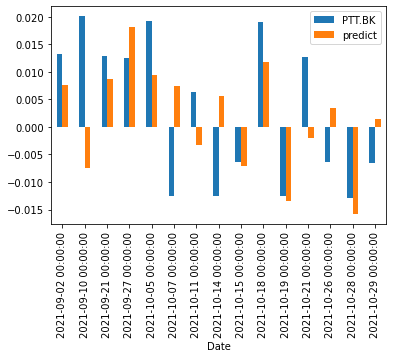

In [50]:
compare.plot(kind='bar')

<AxesSubplot:xlabel='Date'>

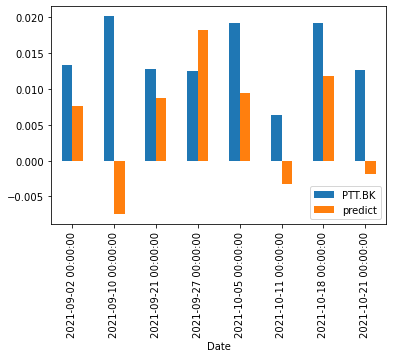

In [51]:
compare[compare['PTT.BK']>0].plot(kind='bar')

<AxesSubplot:xlabel='Date'>

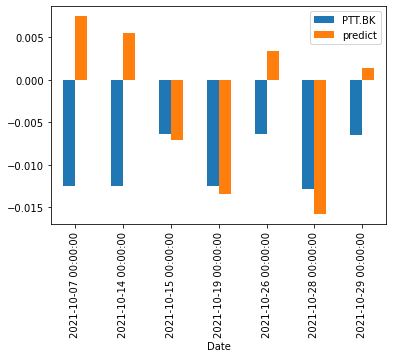

In [52]:
compare[compare['PTT.BK']<0].plot(kind='bar')

In [55]:
# คูณเพื่อดูว่าทำนายไปทางเดียวกับค่าจริงไหม
compare.product(axis=1)

Date
2021-09-02    0.000102
2021-09-10   -0.000149
2021-09-21    0.000112
2021-09-27    0.000227
2021-10-05    0.000182
2021-10-07   -0.000094
2021-10-11   -0.000021
2021-10-14   -0.000069
2021-10-15    0.000045
2021-10-18    0.000224
2021-10-19    0.000168
2021-10-21   -0.000024
2021-10-26   -0.000022
2021-10-28    0.000204
2021-10-29   -0.000009
dtype: float64